<a href="https://colab.research.google.com/github/tcqnmi/Sistemas_IA/blob/main/RN_Circles1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix

#Creación del conjunto de datos sintéticas
x, y = make_circles(n_samples=1000, noise=0.1, random_state=24)

#División del conjunto de datos en entrenmaiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=500)

#Normalización de los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Creación de la red neuronal (con Keras)


In [36]:
model = Sequential()

# Capa oculta 4 neuronas / capa de entrada 2 neuronas

model.add(Dense(4, input_dim=2, activation='relu'))

#Capa de salida > (1 neurona/ función de activación: sigmoid)
model.add(Dense(1, activation='sigmoid' ))


model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

#Predicciones del conjunto de prueba
# astype(int) convierte los valores booleanos a enteros
y_pred = (model.predict(x_test)>0.5).astype(int)

# Medición de la bondad del ajuste
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: ", accuracy)

16/16 [==============================] - 0s 1ms/step
Precisión:  0.822


6092/6092 [==============================] - 8s 1ms/step


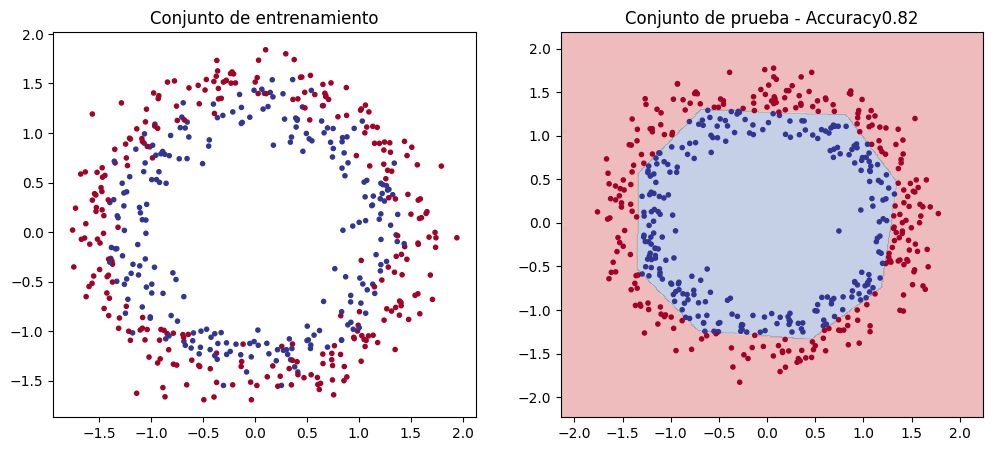

In [37]:
#Representacióin figura

plt.figure(figsize=(12,5))

#Creación deuna mall de predicciones
x_min, x_max = x[:,0].min() -1, x[:,0].max()+1
y_min, y_max = x[:,1].min() -1, x[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh_datos = np.c_[xx.ravel(), yy.ravel()]

#Realizar las predicciones en la malla
mesh_pred = (model.predict(mesh_datos)>0.5).astype(int)

#Conjunto de entrenamiento
plt.subplot(1,2,1)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train, cmap=plt.cm.RdYlBu, marker='.')
plt.title('Conjunto de entrenamiento')

#Conjunto de prueba con predicciones
plt.subplot(1,2,2)
plt.contourf(xx, yy, mesh_pred.reshape(xx.shape), cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(x_test[:,0],x_test[:,1], c=y_pred, cmap=plt.cm.RdYlBu, marker='.')
plt.title(f'Conjunto de prueba - Accuracy{accuracy:.2f}')
plt.show()


In [38]:
#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión: 
[[198  32]
 [ 57 213]]


In [39]:
#Resultados recogidos durante el entrenamiento

print(hist.history)
print(list(hist.history.keys()))


{'loss': [0.7011523246765137, 0.6848678588867188, 0.6807596683502197, 0.6781180500984192, 0.6757746934890747, 0.6710891723632812, 0.6652692556381226, 0.6602270603179932, 0.6554631590843201, 0.6491802930831909, 0.6456672549247742, 0.6413282155990601, 0.63364177942276, 0.6295375227928162, 0.622925341129303, 0.616864025592804, 0.6119409799575806, 0.6071076989173889, 0.6029748916625977, 0.5991379618644714, 0.5944547653198242, 0.5896878838539124, 0.5868538618087769, 0.5824580788612366, 0.5815144181251526, 0.5751588940620422, 0.5702750086784363, 0.5676571130752563, 0.5649484395980835, 0.5616157054901123, 0.5584776401519775, 0.5571156740188599, 0.5525647401809692, 0.549107551574707, 0.5470119118690491, 0.5405081510543823, 0.5393733978271484, 0.5366288423538208, 0.5288804769515991, 0.5280382037162781, 0.5235910415649414, 0.5179016590118408, 0.5132023096084595, 0.508281409740448, 0.5044748187065125, 0.5040602087974548, 0.4956396520137787, 0.49214738607406616, 0.4897022545337677, 0.4856074154376

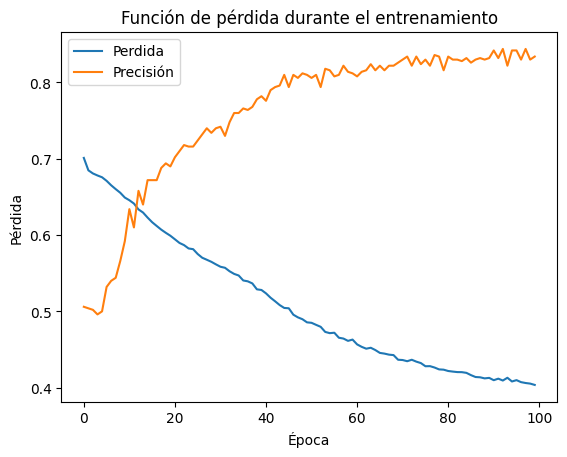

In [40]:
#Visualización de la función de pérdida durante el entrenamiento

plt.plot(hist.history['loss'], label = 'Perdida')
plt.plot(hist.history['accuracy'], label = 'Precisión')
plt.title('Función de pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()